In [1]:
filename = "D:/Kişisel Klasörler/Dersler/Artificial Intelligence/steam.csv"

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv(filename, header=None, index_col=None, names=['GameID', 'Review', 'ReviewSentiment', 'Helpful'])


In [ ]:
df.head(50)

In [ ]:
df.describe()

In [ ]:
df.info()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df['ReviewSentiment'] = df['ReviewSentiment'].replace(np.nan, 0)

In [6]:
df['ReviewSentiment'] = df['ReviewSentiment'].replace(-1, 0)

In [ ]:
df.describe()

In [ ]:
df.loc[df['ReviewSentiment'] == 0]

In [7]:
reviews = df['Review'].apply(lambda x: np.str_(x)).values
labels = df['ReviewSentiment'].values

In [8]:
train_data, test_data, y_train, y_test = train_test_split(reviews,
                                                         labels,
                                                         test_size=0.33,
                                                         )

In [9]:
print("Train set and train labels:", train_data.shape,y_train.shape)
print("Test set and test labels:", test_data.shape, y_test.shape)


Train set and train labels: (4299461,) (4299461,)
Test set and test labels: (2117645,) (2117645,)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(train_data)

CountVectorizer(max_features=1000)

In [12]:
X_train = vectorizer.transform(train_data)
X_test = vectorizer.transform(test_data)

In [13]:
print("Train set and test set:", X_train.shape,X_test.shape)

Train set and test set: (4299461, 1000) (2117645, 1000)


In [14]:
vectorizer.vocabulary_

{'pretty': 683,
 'cool': 198,
 'concept': 188,
 'for': 344,
 'game': 360,
 '10': 0,
 'and': 54,
 'it': 462,
 'really': 712,
 'makes': 533,
 'you': 994,
 'think': 863,
 'some': 796,
 'of': 610,
 'these': 859,
 'levels': 497,
 'feels': 325,
 'sometimes': 799,
 'love': 524,
 'the': 854,
 'difficulty': 243,
 'at': 73,
 'times': 874,
 'feel': 323,
 'like': 500,
 'could': 200,
 'play': 662,
 'endless': 277,
 'portal': 678,
 'but': 129,
 'there': 858,
 'are': 64,
 'where': 956,
 'get': 368,
 'somewhat': 800,
 'from': 352,
 'change': 156,
 'certain': 150,
 'otherwise': 634,
 'great': 387,
 'to': 877,
 'pick': 657,
 'up': 910,
 'haven': 409,
 'even': 291,
 'played': 664,
 'this': 866,
 'let': 494,
 'me': 546,
 'write': 984,
 'review': 728,
 'so': 794,
 'terrible': 849,
 'graphics': 386,
 'gameplay': 361,
 'everything': 296,
 'do': 246,
 'not': 605,
 'because': 94,
 'is': 458,
 'that': 852,
 'your': 995,
 'time': 873,
 'regret': 719,
 'getting': 370,
 'hope': 432,
 'they': 860,
 'release': 720,


In [15]:
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(train_data)

X_train = tokenizer.texts_to_sequences(train_data)
X_test = tokenizer.texts_to_sequences(test_data)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
print(train_data[1])
print(X_train[1])

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train, padding = 'post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen=maxlen)

In [ ]:
print(X_train[0,:])

In [ ]:
from keras.layers import Embedding,Flatten,Dense

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=maxlen))
model.add(Flatten())
#model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

In [ ]:
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train, y_train, epochs= 10,validation_data = (X_test,y_test))

In [18]:
from keras.layers import Flatten,Dropout

In [19]:
input_dim = X_train.shape[1]

model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim=input_dim))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(16,activation='elu'))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               128128    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 146,721
Trainable params: 146,721
Non-trainable params: 0
________________________________________________

In [ ]:
from keras.optimizers import SGD

In [ ]:
opt= SGD(lr=0.01)

In [20]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model2_history = model2.fit(X_train, y_train, epochs=5,validation_data=(X_test,y_test))

Epoch 1/5


C:\Users\aleyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


134359/134359 [==============================] - 338s 2ms/step - loss: 0.3038 - accuracy: 0.8759 - val_loss: 0.2854 - val_accuracy: 0.8834
Epoch 2/5
134359/134359 [==============================] - 480s 4ms/step - loss: 0.2827 - accuracy: 0.8854 - val_loss: 0.2836 - val_accuracy: 0.8850
Epoch 3/5
134359/134359 [==============================] - 884s 7ms/step - loss: 0.2775 - accuracy: 0.8879 - val_loss: 0.2835 - val_accuracy: 0.8854
Epoch 4/5
134359/134359 [==============================] - 1043s 8ms/step - loss: 0.2748 - accuracy: 0.8894 - val_loss: 0.2819 - val_accuracy: 0.8858
Epoch 5/5
134359/134359 [==============================] - 1209s 9ms/step - loss: 0.2736 - accuracy: 0.8902 - val_loss: 0.2812 - val_accuracy: 0.8857


In [22]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))

loss,accuracy = model2.evaluate(X_test,y_test,verbose=False)
print("Test accuracy:{:.4f}".format(accuracy))

Training accuracy: 0.8920
Test accuracy:0.8857


In [23]:
import matplotlib.pyplot as plt

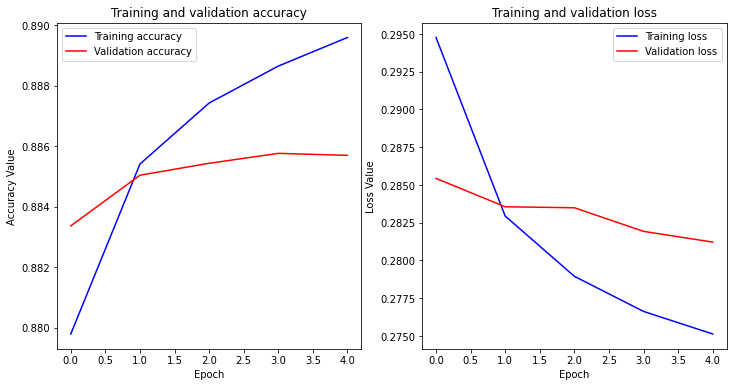

In [25]:
#eski
acc = model2_history.history['accuracy']
val_acc = model2_history.history['val_accuracy']
loss =  model2_history.history['loss']
val_loss =  model2_history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(acc,'b',label='Training accuracy')
plt.plot(val_acc,'r',label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss,'b',label='Training loss')
plt.plot(val_loss,'r',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Training and validation loss')
plt.legend()


In [26]:
model3 = Sequential()
model3.add(Dense(128,kernel_regularizer=keras.regularizers.l2(0.001),activation='relu',input_dim=input_dim))
model3.add(Dropout(0.5))
model3.add(Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model3.add(Dropout(0.5))
model3.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               128128    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 146,721
Trainable params: 146,721
Non-trainable params: 0
________________________________________________

In [27]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model3_history = model3.fit(X_train, y_train, epochs=5,validation_data=(X_test,y_test))

Epoch 1/5


C:\Users\aleyn\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_8/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_8/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_8/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


134359/134359 [==============================] - 1229s 9ms/step - loss: 0.4024 - accuracy: 0.8552 - val_loss: 0.3683 - val_accuracy: 0.8645
Epoch 2/5
134359/134359 [==============================] - 1995s 15ms/step - loss: 0.3890 - accuracy: 0.8566 - val_loss: 0.3673 - val_accuracy: 0.8651
Epoch 3/5
134359/134359 [==============================] - 2788s 21ms/step - loss: 0.3882 - accuracy: 0.8560 - val_loss: 0.3697 - val_accuracy: 0.8641
Epoch 4/5
134359/134359 [==============================] - 2844s 21ms/step - loss: 0.3870 - accuracy: 0.8560 - val_loss: 0.3669 - val_accuracy: 0.8660
Epoch 5/5
134359/134359 [==============================] - 3085s 23ms/step - loss: 0.3871 - accuracy: 0.8560 - val_loss: 0.3688 - val_accuracy: 0.8627


In [29]:
loss, accuracy = model3.evaluate(X_train, y_train, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))

loss,accuracy = model3.evaluate(X_test,y_test,verbose=False)
print("Test accuracy:{:.4f}".format(accuracy))

Training accuracy: 0.8624
Test accuracy:0.8627


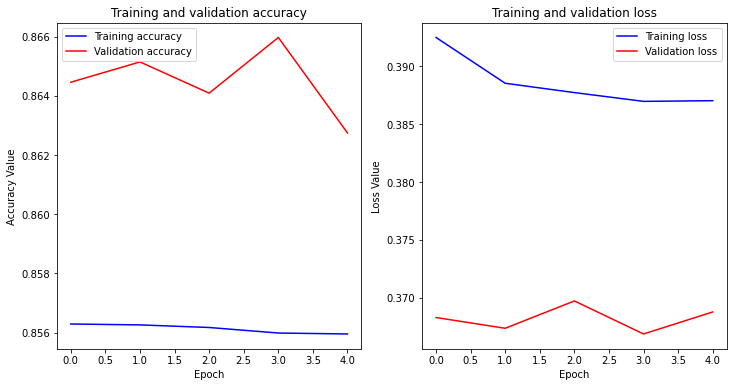

In [30]:
#eski
acc = model3_history.history['accuracy']
val_acc = model3_history.history['val_accuracy']
loss =  model3_history.history['loss']
val_loss =  model3_history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(acc,'b',label='Training accuracy')
plt.plot(val_acc,'r',label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss,'b',label='Training loss')
plt.plot(val_loss,'r',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Training and validation loss')
plt.legend()
